In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import random

In [2]:
frame = cv2.imread('00054_Mask.jpg')

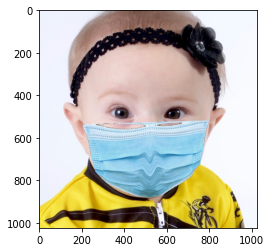

In [3]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [4]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [5]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [6]:
gray.shape

(1024, 1024)

In [7]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex: ex+ew]

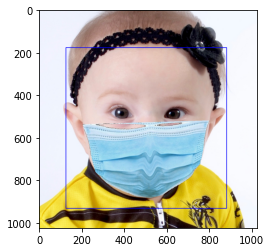

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

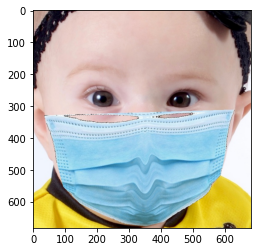

In [9]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [10]:
final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [11]:
test_model = tf.keras.models.load_model('model_2.h5')

In [12]:
def decode_pred(prob):
    if prob >= 0.5:
        return 1
    else:
        return 0

In [13]:
Prediction = test_model.predict(final_image)

In [14]:
Prediction

array([[0.9935256]], dtype=float32)

In [15]:
decode_pred(Prediction[0])

1

CHECKING ON LIVE IMAGES USING WEBCAM

In [16]:
import cv2

path = 'haarcascade_frontalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

#SETTING THE RECTANGLE BACKGROUND TO WHITE
rectangle_bgr = (255, 255, 255)
#
img = np.zeros((500, 500))
#
text = 'Empty Text'
#
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness = 1)[0]
#
text_offset_x = 10
text_offset_y = img.shape[0] - 25
#
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0, 0, 0), thickness = 1)

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open webcam")

while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]

    final_image = cv2.resize(face_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    #plt.imsave('myimage.jpg', final_image)
    font = cv2.FONT_HERSHEY_COMPLEX
    Prediction = test_model.predict(final_image)
    Prediction = decode_pred(Prediction[0])
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if(Prediction == 1):
        status = "Face Mask"

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 255, 0), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0))
        
    else:
        status = "No Mask"

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    cv2.imshow('Face Mask Detector', frame)

    if cv2.waitKey(1) == 13:
        break

cap.release()
cap.destroyAllWindows()

Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected


AttributeError: 'cv2.VideoCapture' object has no attribute 'destroyAllWindows'